In [50]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [51]:
df = pd.read_csv("/content/diabetes.csv")

In [52]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [54]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [55]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [56]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
df.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [59]:
df["Pregnancies"] = df["Pregnancies"].astype("category")
df["Outcome"] = df["Outcome"].astype("category")
df["Age"] = df["Age"].astype("category")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    category
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    category
 8   Outcome                   768 non-null    category
dtypes: category(3), float64(2), int64(4)
memory usage: 41.6 KB


In [61]:
df = df.rename(columns={"BloodPressure":"Blood_Pressure","SkinThickness":"Skin_Thickness","DiabetesPedigreeFunction":"Diabetes_Pedigree_Function"})
df

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [62]:
df["Pregnancies"] = df["Pregnancies"].apply(lambda x: np.nan if x==0 else x)
df["Glucose"] = df["Glucose"].apply(lambda x: np.nan if x==0 else x)
df["Blood_Pressure"] = df["Blood_Pressure"].apply(lambda x: np.nan if x==0 else x)
df["Skin_Thickness"] = df["Skin_Thickness"].apply(lambda x: np.nan if x==0 else x)
df["Insulin"] = df["Insulin"].apply(lambda x: np.nan if x==0 else x)
df["BMI"] = df["BMI"].apply(lambda x: np.nan if x==0 else x)
df["Diabetes_Pedigree_Function"] = df["Diabetes_Pedigree_Function"].apply(lambda x: np.nan if x==0 else x)
df["Age"] = df["Age"].apply(lambda x: np.nan if x==0 else x)
#df["Outcome"] = df["Outcome"].apply(lambda x: np.nan if x==0 else x)

In [63]:
df.describe(include="all")

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.0,768.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,500.0
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,NaN,NaN
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,NaN,NaN
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,NaN,NaN
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,NaN,NaN
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,NaN,NaN
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,NaN,NaN


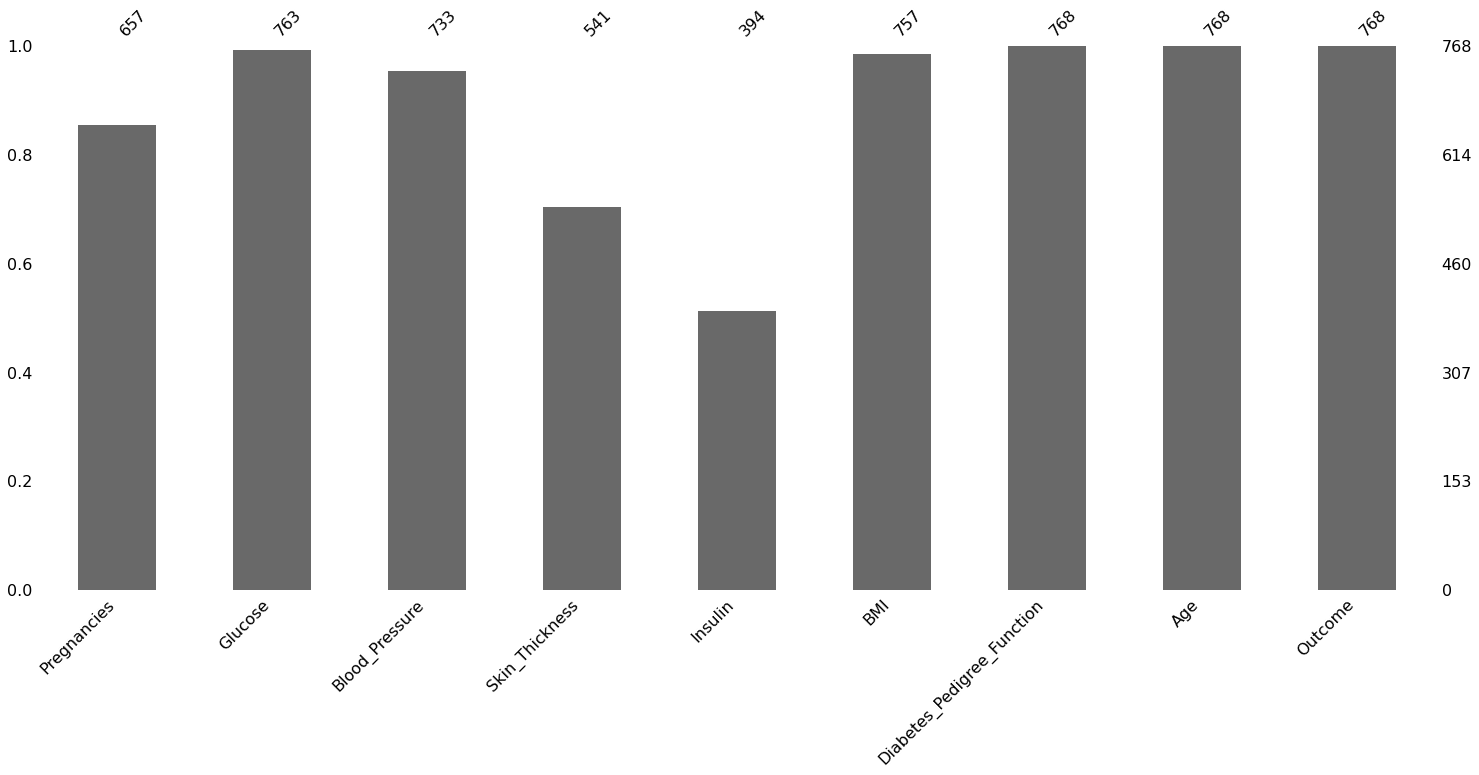

In [64]:
msno.bar(df)

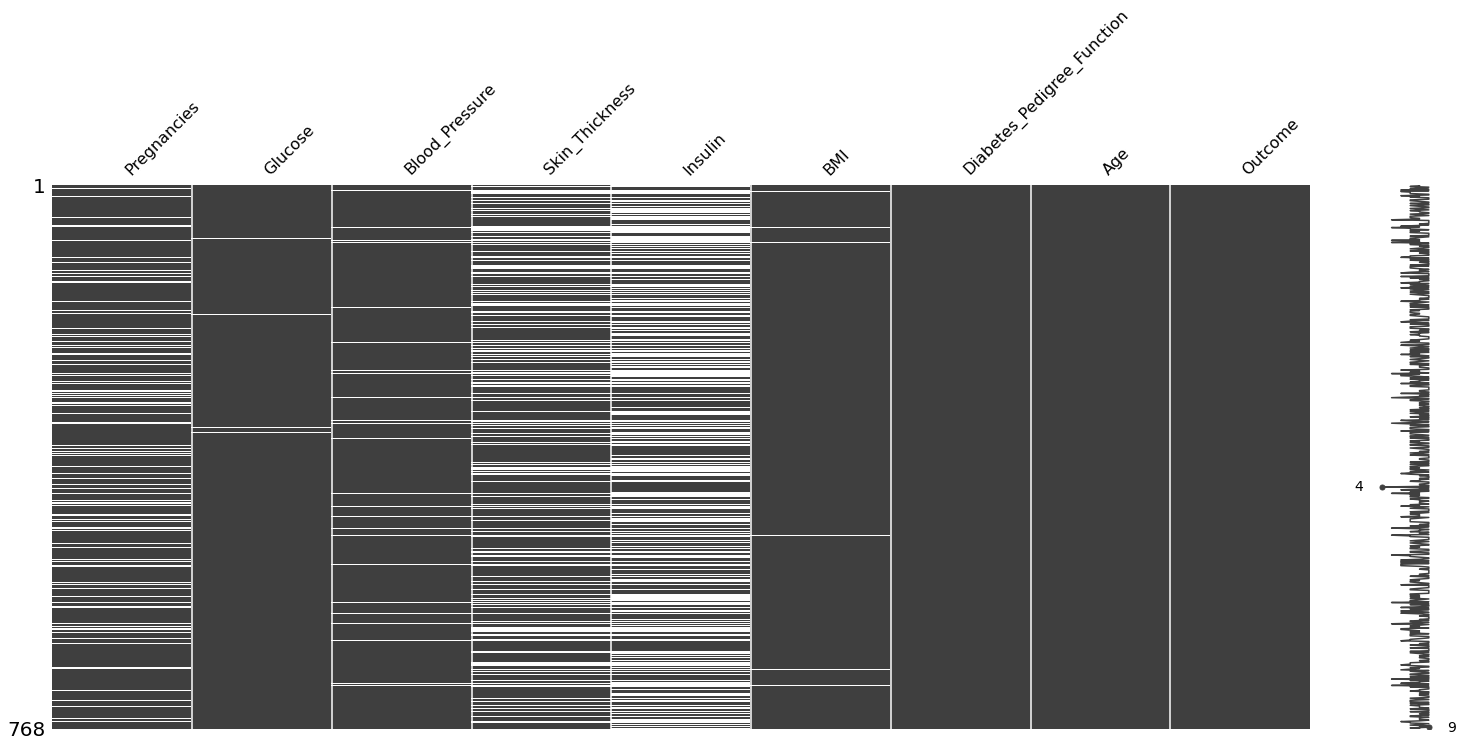

In [65]:
msno.matrix(df)

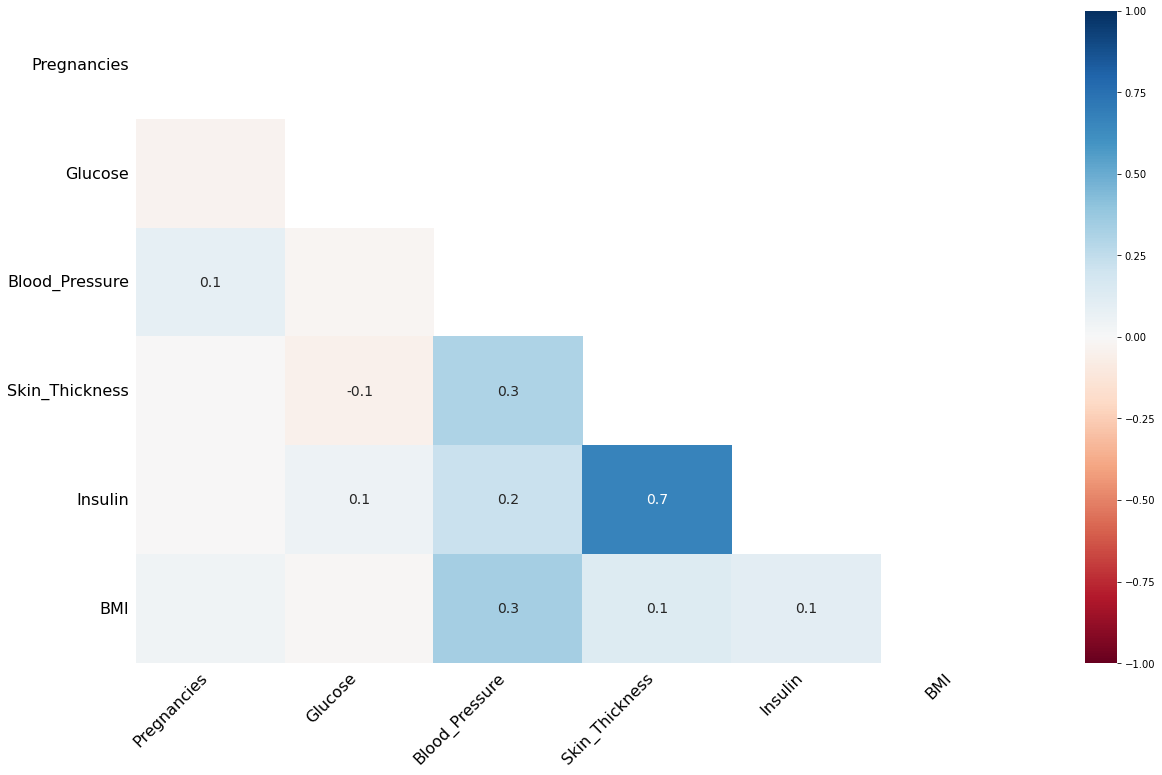

In [66]:
msno.heatmap(df)

In [67]:
from sklearn.impute import SimpleImputer
df_mean = df.copy(deep=True)
df_imputation = SimpleImputer(strategy="mean")
df_mean.iloc[:,:] = df_imputation.fit_transform(df_mean)

In [68]:
df.describe(include="all")

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.0,768.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,500.0
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,NaN,NaN
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,NaN,NaN
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,NaN,NaN
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,NaN,NaN
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,NaN,NaN
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,NaN,NaN


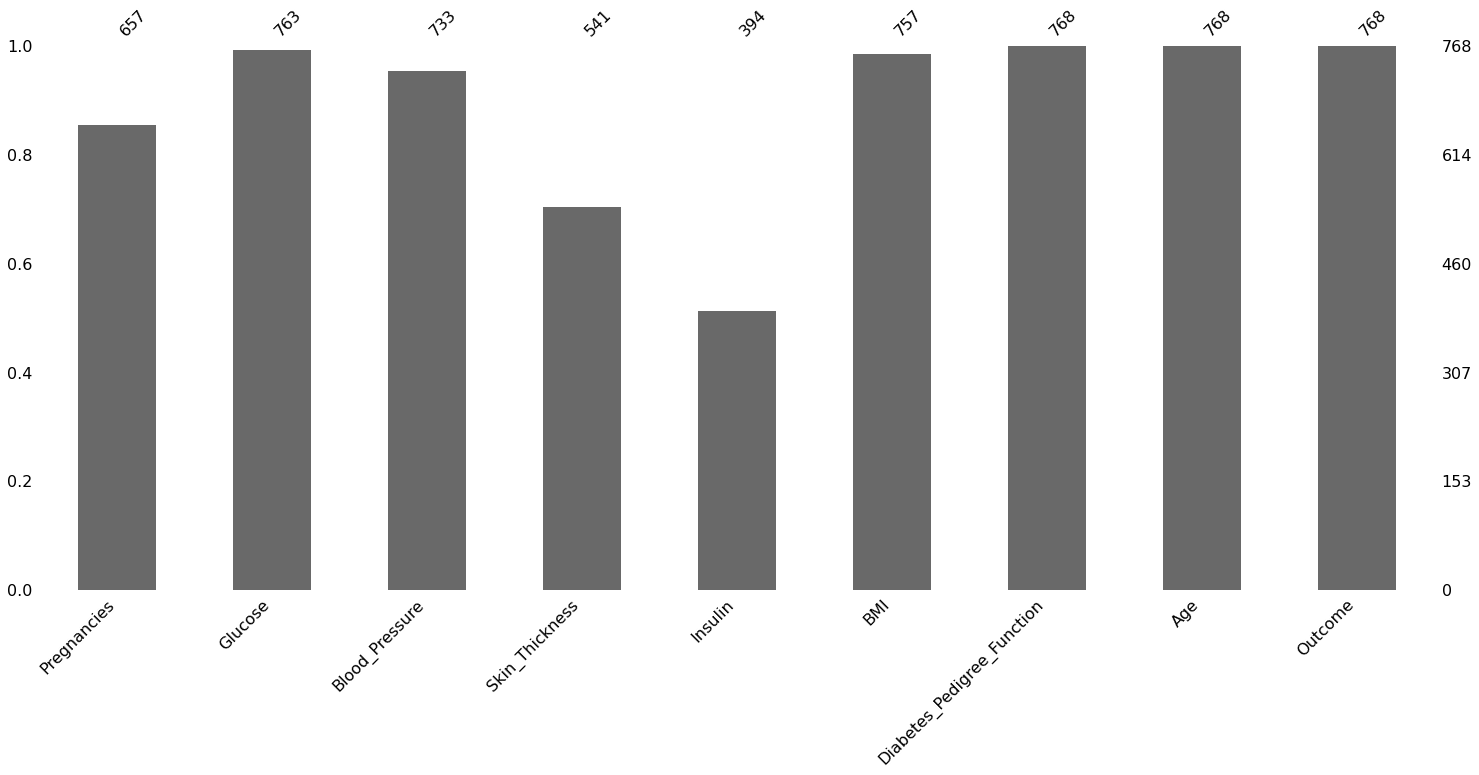

In [69]:
msno.bar(df)

In [70]:
df["Pregnancies"] = df["Pregnancies"].replace([17],np.nan)

In [71]:
df["Pregnancies"] = df["Pregnancies"].apply(lambda x: np.nan if x>10 else x)

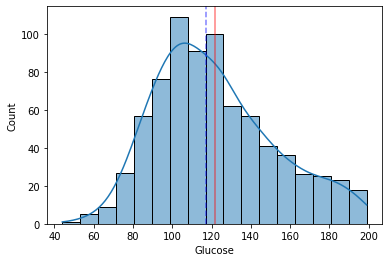

In [72]:
sns.histplot(df["Glucose"],kde=True)
plt.axvline(x=df.Glucose.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.Glucose.median(), c="blue", alpha=0.5, ls="--", label="median")

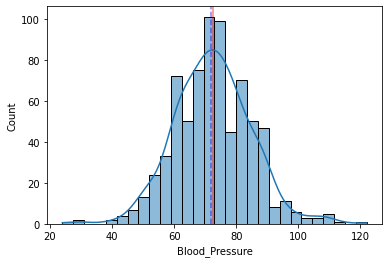

In [73]:
sns.histplot(df["Blood_Pressure"], kde= True)
plt.axvline(x=df.Blood_Pressure.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.Blood_Pressure.median(), c="blue", alpha=0.5, ls="--", label="median")

Text(0.5, 1.0, 'skewness')

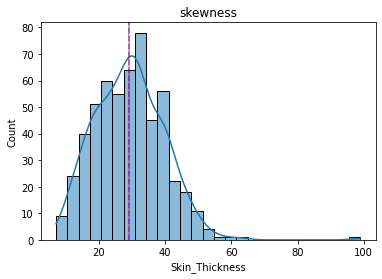

In [74]:
sns.histplot(df["Skin_Thickness"],kde=True)
plt.axvline(x=df.Skin_Thickness.mean(),c="red", alpha=0.5, label="mean")
plt.axvline(x=df.Skin_Thickness.median(), c="blue", alpha=0.5, ls="--", label="median")
plt.title("skewness")

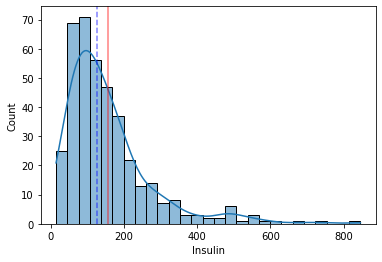

In [75]:
sns.histplot(df["Insulin"],kde=True)
plt.axvline(x=df.Insulin.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.Insulin.median(), c="blue", alpha=0.5, ls="--", label="median")

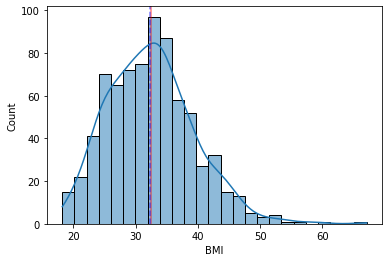

In [76]:
sns.histplot(df["BMI"],kde=True)
plt.axvline(x=df.BMI.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.BMI.median(), c="blue", alpha=0.5, ls="--", label="median")

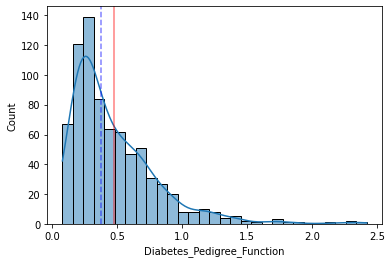

In [77]:
sns.histplot(df["Diabetes_Pedigree_Function"],kde=True)
plt.axvline(x=df.Diabetes_Pedigree_Function.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.Diabetes_Pedigree_Function.median(), c="blue", alpha=0.5, ls="--", label="median")

# log transformation

In [78]:
df["Skin_Thickness"] = np.log(df["Skin_Thickness"])
df["Insulin"] = np.log(df["Insulin"])
df["BMI"] = np.log(df["BMI"])
df["Diabetes_Pedigree_Function"] = np.log(df["Diabetes_Pedigree_Function"])

Text(0.5, 1.0, 'skewness')

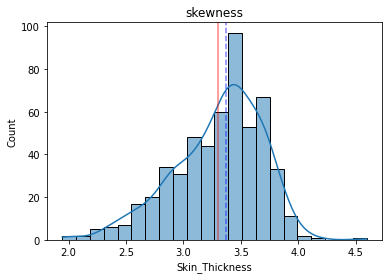

In [79]:
sns.histplot(df["Skin_Thickness"],kde=True)
plt.axvline(x=df.Skin_Thickness.mean(),c="red", alpha=0.5, label="mean")
plt.axvline(x=df.Skin_Thickness.median(), c="blue", alpha=0.5, ls="--", label="median")
plt.title("skewness")

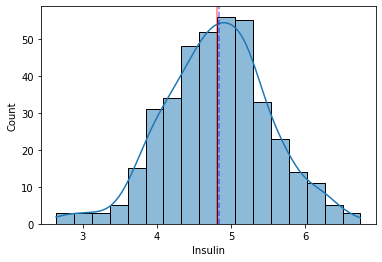

In [80]:
sns.histplot(df["Insulin"],kde=True)
plt.axvline(x=df.Insulin.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.Insulin.median(), c="blue", alpha=0.5, ls="--", label="median")

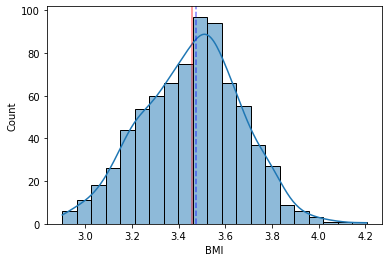

In [81]:
sns.histplot(df["BMI"],kde=True)
plt.axvline(x=df.BMI.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.BMI.median(), c="blue", alpha=0.5, ls="--", label="median")

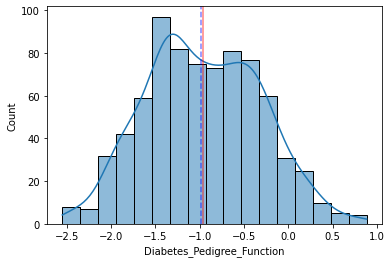

In [82]:
sns.histplot(df["Diabetes_Pedigree_Function"],kde=True)
plt.axvline(x=df.Diabetes_Pedigree_Function.mean(), c="red", alpha=0.5, label="mean")
plt.axvline(x=df.Diabetes_Pedigree_Function.median(), c="blue", alpha=0.5, ls="--", label="median")

In [83]:
df.describe(include="all")

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
count,623.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.0,768.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,500.0
mean,4.067416,121.686763,72.405184,3.302782,4.808038,3.457507,-0.959940,NaN,NaN
std,2.699639,30.535641,12.382158,0.389108,0.698899,0.212343,0.644322,NaN,NaN
min,1.000000,44.000000,24.000000,1.945910,2.639057,2.901422,-2.551046,NaN,NaN
25%,2.000000,99.000000,64.000000,3.091042,4.334001,3.314186,-1.411614,NaN,NaN
50%,3.000000,117.000000,72.000000,3.367296,4.828314,3.475067,-0.987526,NaN,NaN
75%,6.000000,141.000000,80.000000,3.583519,5.247024,3.600048,-0.468006,NaN,NaN


In [84]:
df.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6.0,148.0,72.0,3.555348,NaN,3.514526,-0.466809,50,1
1,1.0,85.0,66.0,3.367296,NaN,3.280911,-1.046969,31,0
2,8.0,183.0,64.0,NaN,NaN,3.148453,-0.397497,32,1
3,1.0,89.0,66.0,3.135494,4.543295,3.335770,-1.789761,21,0
4,NaN,137.0,40.0,3.555348,5.123964,3.763523,0.827678,33,1


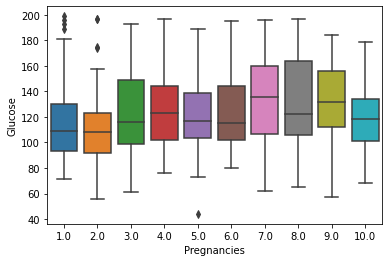

In [85]:
sns.boxplot(x="Pregnancies",y="Glucose",data=df)
# here i have seen the higher outlier is in 1 pregnency 
# there is also the highest chance of glucose.

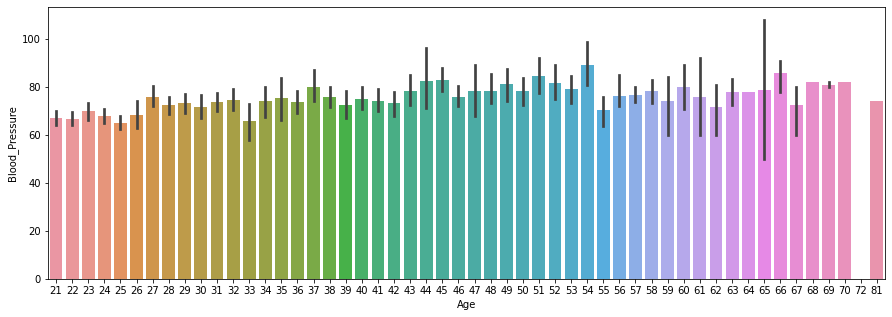

In [86]:
plt.figure(figsize=(15,5))
sns.barplot(x="Age",y="Blood_Pressure",data=df)
# 65 years of bage group people suffer higher with blood pressure

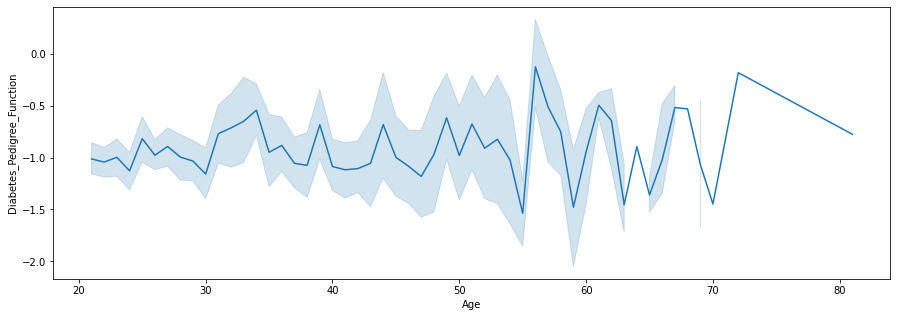

In [91]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Age",y="Diabetes_Pedigree_Function",data=df)
# it shows if the person have 1 then there is chance of diabetes if there is in negative or -1 then it will show
# chance of diabetes. 
# the higher the chance of diabetes between 55 to 70.

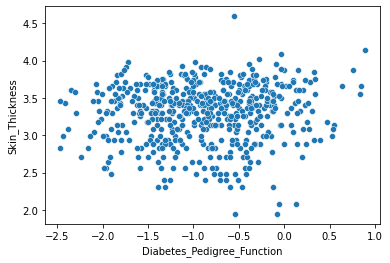

In [101]:
sns.scatterplot(x="Diabetes_Pedigree_Function",y="Skin_Thickness",data=df)
# whose diabetes pedegree function is less than -0.5 then they have skin thickness 2.5 to 4.0
# but i have seen from 0.0 to -1.5 in diabetes pedegree function have the skin thickness level in between 3.0 to 3.7

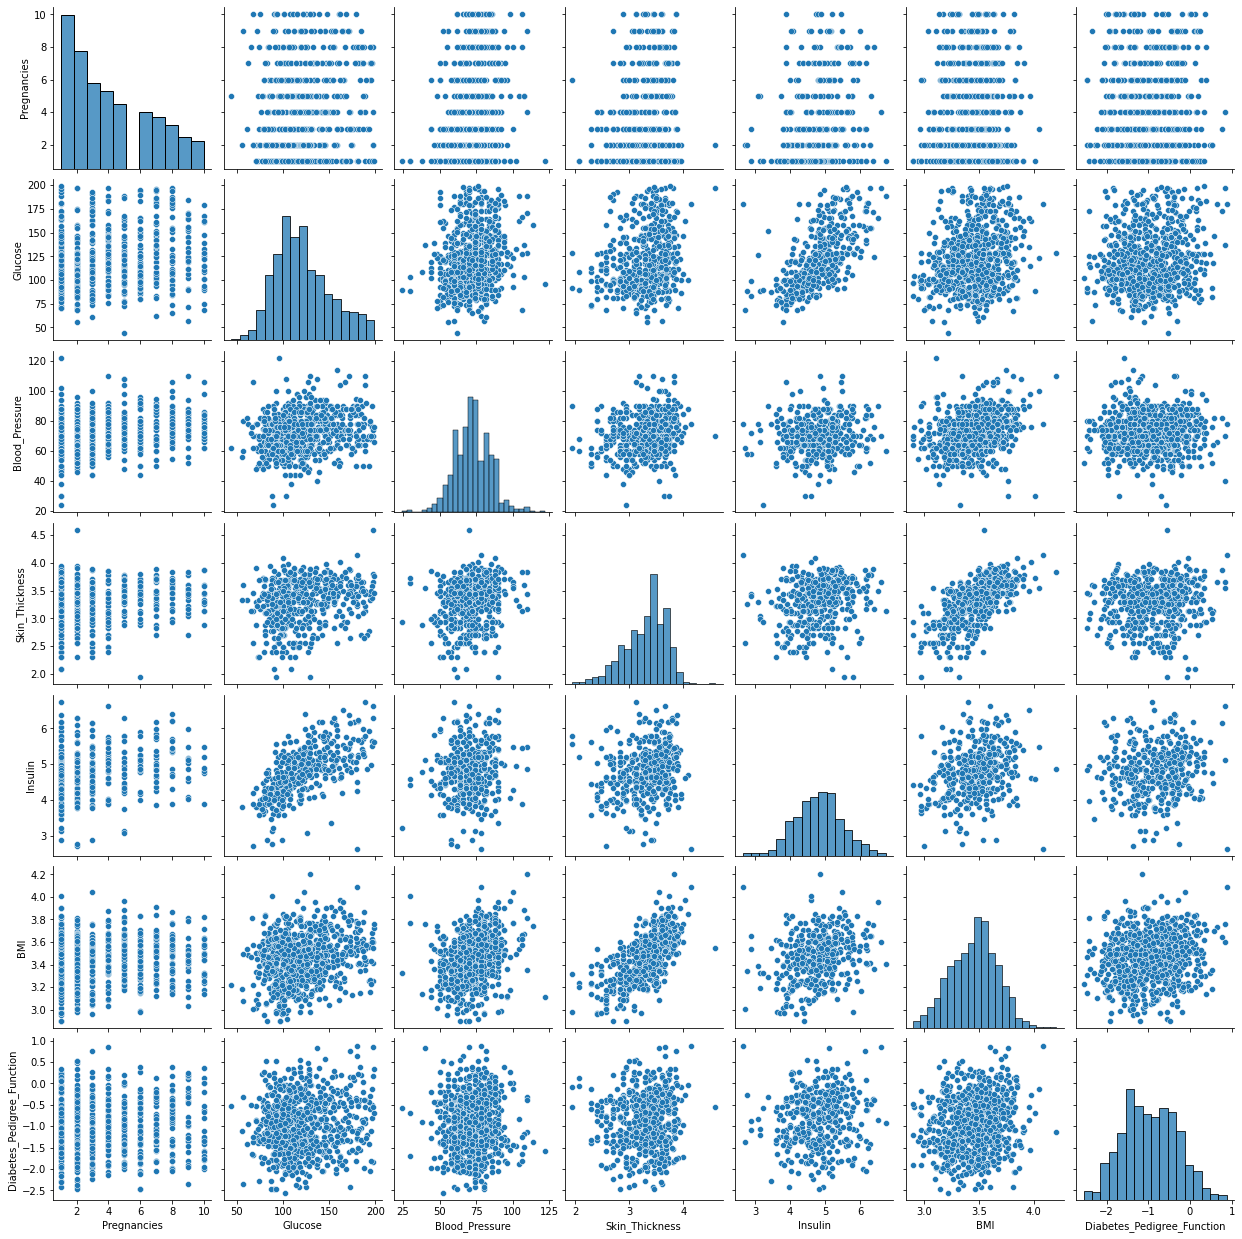

In [93]:
sns.pairplot(df)

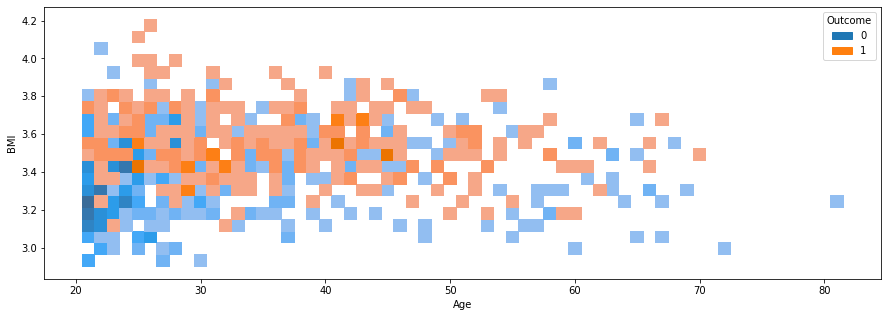

In [107]:
plt.figure(figsize=(15,5))
sns.histplot(x="Age",y="BMI",hue="Outcome",data=df)
#Diabetes data set dimensions : (768, 9) We can observe that the data set contain 768 rows and 9 columns. 
#‘ Outcome ’ is the column which we are going to predict, which says if the patient is diabetic or not.
# 1 means the person is diabetic and 0 means a person is not.

# from 22 to 55 years old people suffering from diabetes whose BMI vary from 3.3 to 3.9